In [1]:
from matplotlib import pyplot, cm
import numpy
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

In [2]:
nx = 41
ny = 41

l = 1.
h = 1.

dx = l/(nx-1)
dy = h/(ny-1)

l1_target = 1e-6

x = numpy.linspace(0,1,nx)
y = numpy.linspace(0,1,ny)
X,Y = numpy.meshgrid(x,y)
psi = numpy.zeros((ny,nx))
omega = numpy.zeros((ny,nx))

In [3]:
def L1norm(new, old):
    norm = numpy.sum(numpy.abs(new-old))
    return norm

In [4]:
def poisson(psi, omega, dx, dy, l1_target):
    l1_norm = 1
    
    while l1_norm > l1_target:
        psid = psi.copy()
        omegan = omega.copy()
        psi[1:-1,1:-1] = 1/(2*(dx**2 + dy**2)) * \
                        ((psid[1:-1,2:]+psid[1:-1,:-2])*dy**2 +\
                        (psid[2:,1:-1] + psid[:-2,1:-1])*dx**2 +\
                         omegan[1:-1,1:-1]*dx**2*dy**2)
            

        
        omega[1:-1,1:-1] = .25 * (omegan[1:-1,2:] + omegan[1:-1, :-2] \
                              + omegan[2:, 1:-1] + omegan[:-2, 1:-1]) 
        u_j = 1
        omega[-1,1:-1] = 1/2/dy**2 * (8* psid[-2,1:-1]-psid[-3,1:-1]) -\
                            3*u_j/dy
        omega[0,1:-1] = 1/2/dy**2 * (8* psid[1,1:-1]-psid[2,1:-1])    
        omega[1:-1,-1] = 1/2/dx**2 * (8* psid[1:-1,-2]-psid[1:-1,-3])
        omega[1:-1,0] = 1/2/dx**2 * (8* psid[1:-1,1]-psid[1:-1,2])
        
        t1 = L1norm(psid, psi)
        t2 = L1norm(omegan, omega)
        l1_norm = max(t1, t2)
        return psi, omega

In [5]:
a = poisson(psi, omega, dx, dy, l1_target)
b = a[0]

In [6]:
a

(array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ..., 
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]]),
 array([[   0.,    0.,    0., ...,    0.,    0.,    0.],
        [   0.,    0.,    0., ...,    0.,    0.,    0.],
        [   0.,    0.,    0., ...,    0.,    0.,    0.],
        ..., 
        [   0.,    0.,    0., ...,    0.,    0.,    0.],
        [   0.,    0.,    0., ...,    0.,    0.,    0.],
        [   0., -120., -120., ..., -120., -120.,    0.]]))

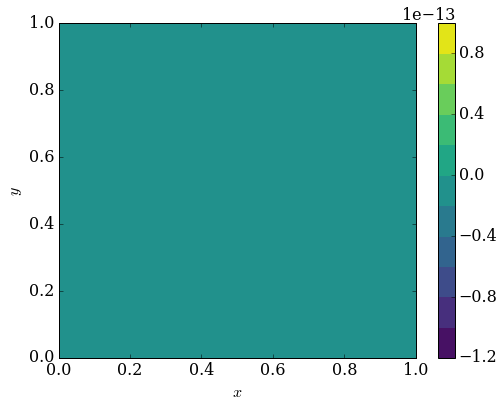

In [7]:
pyplot.figure(figsize=(8,6))
pyplot.contourf(X, Y, b, 12, cmap=cm.viridis)
pyplot.xlabel('$x$')
pyplot.ylabel('$y$')
pyplot.colorbar();